<a href="https://colab.research.google.com/github/Soumiksb06/Generalized-Medicine-Recommendation/blob/main/Gen_Med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv("/content/meta_data - Copy.csv")
len(data)

140

In [ ]:
# # Data preprocessing
# data.dropna(subset=['Height','Age','Weight','Gender','Blood Group','Blood Pressure'], inplace=True)
# data = data[data['Age'].astype(str).str.isnumeric()]
# data = data[data['Weight'] > 0]

# Display basic statistics
print("Basic Statistics:")
print(data.describe())
print("\n")

Basic Statistics:
           Height         Age      Weight  Medication you take for arthritis
count  140.000000  140.000000  140.000000                                0.0
mean   164.671429   25.050000   61.625000                                NaN
std     10.024748   10.018203   13.584418                                NaN
min    134.000000   13.000000   38.000000                                NaN
25%    158.750000   20.000000   50.000000                                NaN
50%    165.000000   21.000000   60.000000                                NaN
75%    170.000000   23.000000   70.000000                                NaN
max    210.000000   60.000000  120.000000                                NaN




In [ ]:
# Calculate BMI
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Apply the categorization function to the 'BMI' column
data['BMI Category'] = data['BMI'].apply(categorize_bmi)
data

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,BMI,BMI Category
0,26-08-2023 10:39,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,Male,O+,Normal,"Pollen Allergy, Dust Allergy, Animal Allergy, ...",...,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem",22.656250,Normal
1,26-08-2023 10:55,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,Male,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.491349,Normal
2,26-08-2023 10:57,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,Aldry lotion,Paracetamol,Abdominal pain,17.301038,Underweight
3,26-08-2023 10:58,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,21.303949,Normal
4,26-08-2023 10:58,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,Male,O+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.343516,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30-08-2023 23:38,NaN,Hemanta Sinha Roy,165,53,65.0,Male,A+,High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,23.875115,Normal
136,31-08-2023 09:36,NaN,Tamanna Ajmi,157,18,59.0,Female,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem",23.936062,Normal
137,02-09-2023 17:38,NaN,ARNAB HAZRA,157,40,64.0,Male,A+,Normal,"Dust Allergy, None",...,NaN,NaN,NaN,NaN,NaN,Montair LC,NaN,Fever,25.964542,Overweight
138,06-09-2023 14:37,NaN,Ps,155,22,63.0,Male,O+,Normal,"Dust Allergy, Smoke Allergy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy",26.222685,Overweight


In [ ]:
#Save the DataFrame as a CSV file
data.to_csv('/content/P_data.csv', index=False)

## Statistical Analysis

Average Weight: 61.62 kgs
Average BMI: 22.64


BMI Distribution by Category:
BMI Category
Normal         82
Overweight     34
Underweight    20
Obese           4
Name: count, dtype: int64


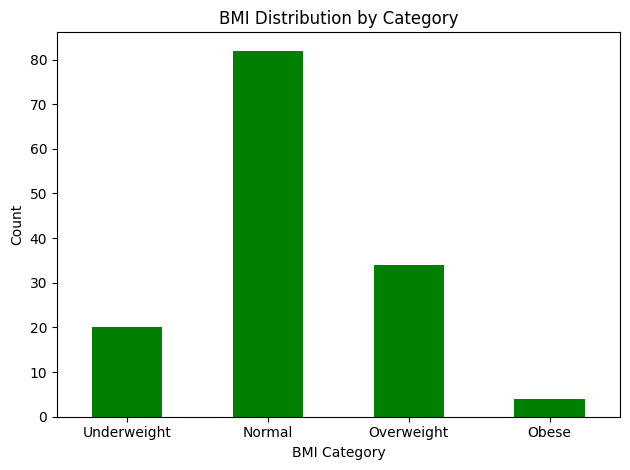

In [ ]:
# Calculate average weight and BMI
average_weight = data['Weight'].mean()
average_bmi = data['BMI'].mean()

# Display average weight and BMI
print(f"Average Weight: {average_weight:.2f} kgs")
print(f"Average BMI: {average_bmi:.2f}")
print("\n")

# Plot BMI Distribution by Category
bmi_category_counts = data['BMI Category'].value_counts()
print("BMI Distribution by Category:")
print(bmi_category_counts)
# Specify the order of categories for plotting
bmi_category_order = ["Underweight", "Normal", "Overweight", "Obese"]

bmi_category_counts.loc[bmi_category_order].plot(kind='bar', color='green')
plt.title("BMI Distribution by Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

Height Distribution by Category:
Height Category
Medium        59
Tall          33
Short         31
Very Tall     10
Very Short     7
Name: count, dtype: int64
Average height is: 164.67 cm


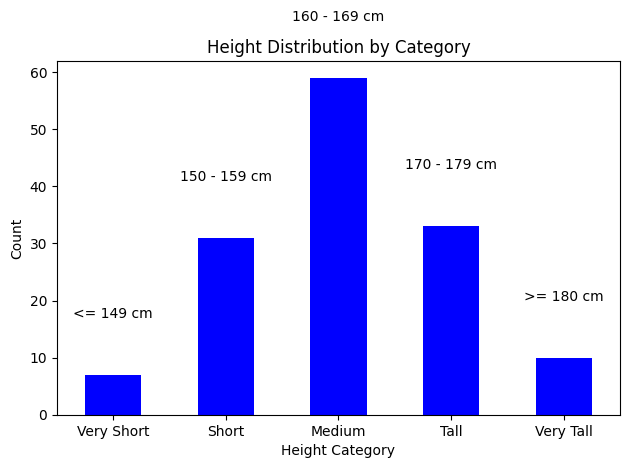

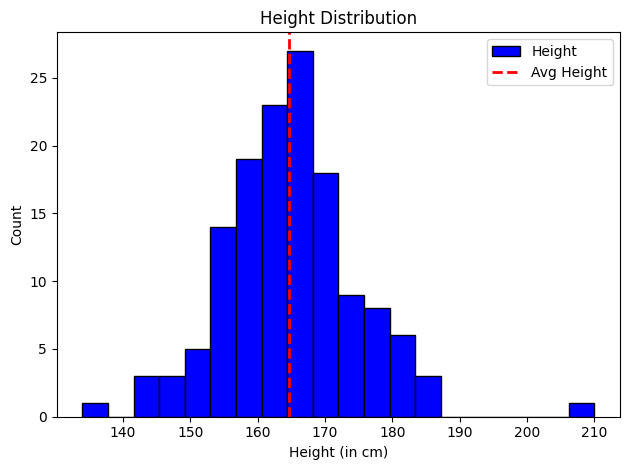

In [ ]:
# Define height categories
def categorize_height(height_cm):
    if height_cm <= 149:
        return "Very Short"
    elif 150 <= height_cm <= 159:
        return "Short"
    elif 160 <= height_cm <= 169:
        return "Medium"
    elif 170 <= height_cm <=179:
        return "Tall"
    else:
        return "Very Tall"

# Apply the categorization function to the 'Height (in cm)' column
data['Height Category'] = data['Height'].apply(categorize_height)

# Plot Height Distribution by Category
height_category_counts = data['Height Category'].value_counts()
print("Height Distribution by Category:")
print(height_category_counts)
# Specify the order of categories for plotting
category_order = ["Very Short", "Short", "Medium", "Tall", "Very Tall"]

height_category_counts.loc[category_order].plot(kind='bar', color='blue')
plt.title("Height Distribution by Category")
plt.xlabel("Height Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
# Add height limits annotations to the plot
height_limits = {
    "Very Short": "<= 149 cm",
    "Short": "150 - 159 cm",
    "Medium": "160 - 169 cm",
    "Tall": "170 - 179 cm",
    "Very Tall": ">= 180 cm"
}

for idx, category in enumerate(category_order):
    plt.text(idx, height_category_counts[category] + 10, height_limits[category], ha='center')

average_height= data['Height'].mean()
print(f"Average height is: {average_height:.2f} cm")
plt.tight_layout()
plt.show()
print("\n")
# Plot height distribution
data['Height'].plot(kind='hist', bins=20, color='blue', edgecolor='black')
plt.axvline(average_height, color='red', linestyle='dashed', linewidth=2, label='Avg Height')
plt.title("Height Distribution")
plt.xlabel("Height (in cm)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()
print("\n")

Gender Distribution:
Gender
Male      73
Female    67
Name: count, dtype: int64


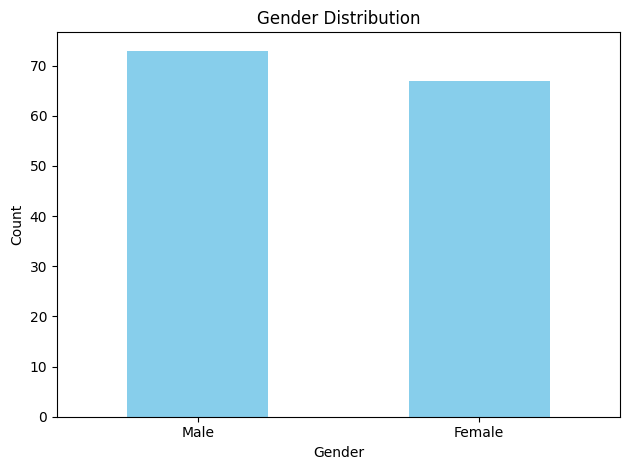

In [ ]:
# Plot gender distribution
gender_counts = data['Gender'].value_counts()
print("Gender Distribution:")
print(gender_counts)
gender_counts.plot(kind='bar', color='skyblue')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

Blood Group Distribution:
Blood Group
O+     48
B+     44
A+     35
AB+    10
O -     1
AB-     1
B-      1
Name: count, dtype: int64


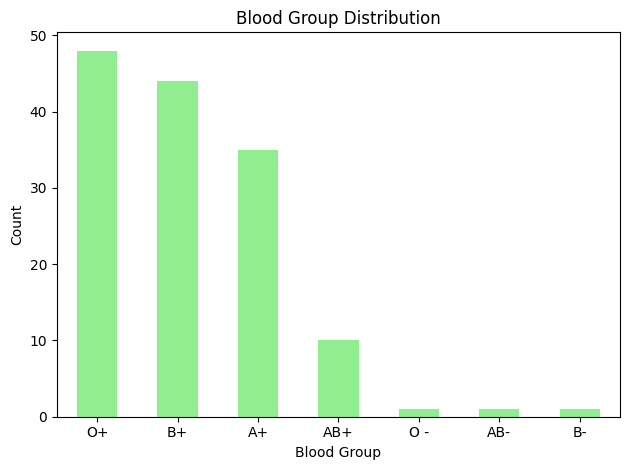

In [ ]:
# Plot blood group distribution
blood_group_counts = data['Blood Group'].value_counts()
print("Blood Group Distribution:")
print(blood_group_counts)
blood_group_counts.plot(kind='bar', color='lightgreen')
plt.title("Blood Group Distribution")
plt.xlabel("Blood Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

Most Common Allergies:
Dust Allergy      38
Cold Air          11
Heat allergy      10
Smoke Allergy      9
Animal Allergy     5
Pollen Allergy     2
Mold Allergy       1
None               1
Name: count, dtype: int64


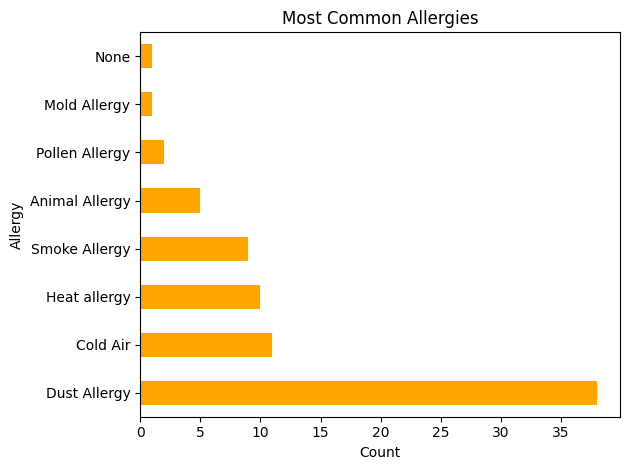

In [ ]:
# Most common allergies
allergies = data['Allergy You Have'].str.split(', ', expand=True).stack().value_counts()
print("Most Common Allergies:")
print(allergies)
allergies[:10].plot(kind='barh', color='orange')
plt.title("Most Common Allergies")
plt.xlabel("Count")
plt.ylabel("Allergy")
plt.tight_layout()
plt.show()
print("\n")

Average Age: 25.05




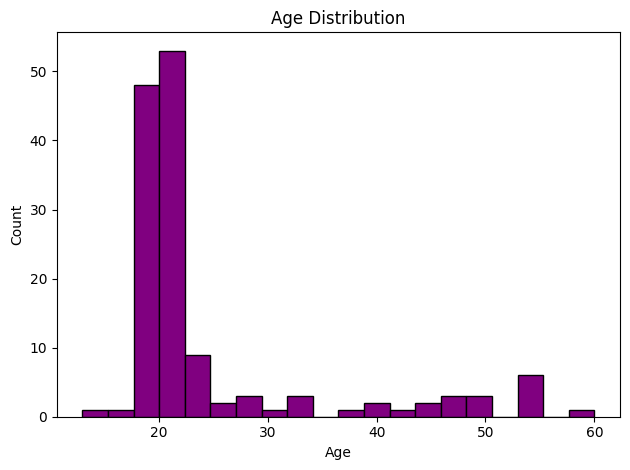

In [ ]:
# Average age of participants
average_age = data['Age'].mean()
print(f"Average Age: {average_age:.2f}")
print("\n")

# Plot age distribution
data['Age'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("\n")

Common Symptoms or Health Issues:
Cold /Cough                                     33
Headache                                        25
Back ache                                       21
rash / skin problem                             17
Fever                                           16
Digestion problems                              12
allergy                                          9
Stomach ache                                     7
Joint pain                                       6
Abdominal pain                                   4
Sore throat                                      3
                                                 2
No                                               2
Conjunctivitis                                   2
Don't have any health issues mentioned above     1
Sleep deprivation                                1
Vertigo,balance disorders                        1
Nope                                             1
Nothing to have                                 

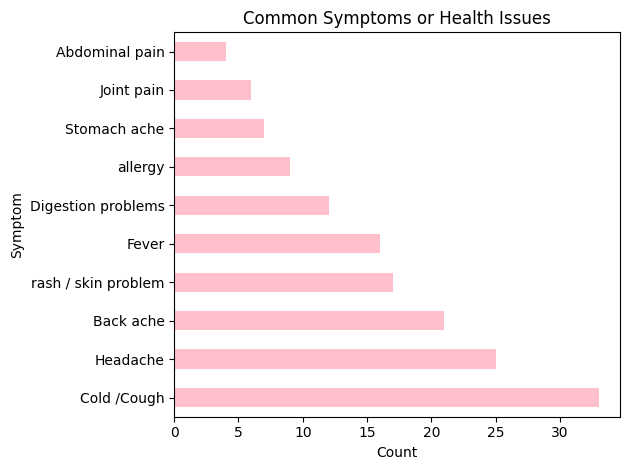

In [ ]:
# Common symptoms or health issues
symptoms = data['What are the current symptoms or health issues you are facing'].str.split(', ', expand=True).stack().value_counts()
print("Common Symptoms or Health Issues:")
print(symptoms)
symptoms[:10].plot(kind='barh', color='pink')
plt.title("Common Symptoms or Health Issues")
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()
print("\n")

# Model Building

In [ ]:
import pandas as pd

# Load the dataset
#df = pd.read_csv("/content/meta_data - Copy.csv")
df = pd.read_csv("/content/P_data.csv")
df

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,BMI,BMI Category
0,26-08-2023 10:39,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,Male,O+,Normal,"Pollen Allergy, Dust Allergy, Animal Allergy, ...",...,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem",22.656250,Normal
1,26-08-2023 10:55,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,Male,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.491349,Normal
2,26-08-2023 10:57,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,Aldry lotion,Paracetamol,Abdominal pain,17.301038,Underweight
3,26-08-2023 10:58,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,21.303949,Normal
4,26-08-2023 10:58,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,Male,O+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.343516,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30-08-2023 23:38,NaN,Hemanta Sinha Roy,165,53,65.0,Male,A+,High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,23.875115,Normal
136,31-08-2023 09:36,NaN,Tamanna Ajmi,157,18,59.0,Female,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem",23.936062,Normal
137,02-09-2023 17:38,NaN,ARNAB HAZRA,157,40,64.0,Male,A+,Normal,"Dust Allergy, None",...,NaN,NaN,NaN,NaN,NaN,Montair LC,NaN,Fever,25.964542,Overweight
138,06-09-2023 14:37,NaN,Ps,155,22,63.0,Male,O+,Normal,"Dust Allergy, Smoke Allergy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy",26.222685,Overweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Timestamp                                                      140 non-null    object 
 1   Email address                                                  118 non-null    object 
 2   Name                                                           140 non-null    object 
 3   Height                                                         140 non-null    int64  
 4   Age                                                            140 non-null    int64  
 5   Weight                                                         140 non-null    float64
 6   Gender                                                         140 non-null    object 
 7   Blood Group                                                   

In [ ]:
#Preprocess data
#!pip install scikit-learn # install scikit-learn library which contains LabelEncoder
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Medical Health History'] = LabelEncoder().fit_transform(df['Medical Health History'])
df['Allergy You Have'] = LabelEncoder().fit_transform(df['Allergy You Have'])
df['Blood Group'] = LabelEncoder().fit_transform(df['Blood Group'])
df['BMI Category']= LabelEncoder().fit_transform(df['BMI Category'])
df

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for migraine,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,BMI,BMI Category
0,26-08-2023 10:39,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,1,6,Normal,14,...,NaN,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem",22.656250,0
1,26-08-2023 10:55,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,1,0,Normal,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.491349,0
2,26-08-2023 10:57,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,0,3,Normal,16,...,NaN,NaN,NaN,NaN,NaN,Aldry lotion,Paracetamol,Abdominal pain,17.301038,3
3,26-08-2023 10:58,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,0,3,Normal,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,21.303949,0
4,26-08-2023 10:58,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,1,6,Normal,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.343516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30-08-2023 23:38,NaN,Hemanta Sinha Roy,165,53,65.0,1,0,High,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,23.875115,0
136,31-08-2023 09:36,NaN,Tamanna Ajmi,157,18,59.0,0,0,Normal,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem",23.936062,0
137,02-09-2023 17:38,NaN,ARNAB HAZRA,157,40,64.0,1,0,Normal,7,...,NaN,NaN,NaN,NaN,NaN,Montair LC,NaN,Fever,25.964542,2
138,06-09-2023 14:37,NaN,Ps,155,22,63.0,1,6,Normal,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy",26.222685,2


In [ ]:
from io import StringIO

# Select only the 'Medication you take...' columns
medication_columns = df.iloc[:, 11:25]

# Combine the values from each row and store in a new column
df['All Medications'] = medication_columns.apply(lambda row: ', '.join(row.dropna()), axis=1)

# Display the updated DataFrame
df.head()

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,BMI,BMI Category,All Medications
0,26-08-2023 10:39,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,Male,O+,Normal,"Pollen Allergy, Dust Allergy, Animal Allergy, ...",...,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem",22.656250,Normal,"Asthalin, Pan D, Montair LC, Paracetamol"
1,26-08-2023 10:55,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,Male,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.491349,Normal,
2,26-08-2023 10:57,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,Aldry lotion,Paracetamol,Abdominal pain,17.301038,Underweight,"Aldry lotion, Paracetamol"
3,26-08-2023 10:58,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,21.303949,Normal,
4,26-08-2023 10:58,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,Male,O+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.343516,Normal,


In [ ]:
df

,Timestamp,Email address,Name,Height,Age,Weight,Gender,Blood Group,Blood Pressure,Allergy You Have,...,Medication you take for arthritis,Medication you take for back pain,Medication you take for depression,Medication you take for anxiety,Medication you take for allergies,Medication you take for cold/ cough/ fever,What are the current symptoms or health issues you are facing,BMI,BMI Category,All Medications
0,26-08-2023 10:39,sbsr117@gmail.com,Soumik Banerjee,160,23,58.0,Male,O+,Normal,"Pollen Allergy, Dust Allergy, Animal Allergy, ...",...,NaN,NaN,NaN,NaN,Montair LC,Paracetamol,"Fever, Cold /Cough, allergy, rash / skin problem",22.656250,Normal,"Asthalin, Pan D, Montair LC, Paracetamol"
1,26-08-2023 10:55,sambasb2002@gmail.com,Samba Ghosh,170,21,65.0,Male,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.491349,Normal,
2,26-08-2023 10:57,annapoorani720@gmail.com,Annapoorani.V,170,21,50.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,Aldry lotion,Paracetamol,Abdominal pain,17.301038,Underweight,"Aldry lotion, Paracetamol"
3,26-08-2023 10:58,pauljoyeta6@gmail.com,Joyeta Paul,165,20,58.0,Female,B+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,21.303949,Normal,
4,26-08-2023 10:58,subhajitdutta1418@gmail.com,Subhajit Dutta,177,20,70.0,Male,O+,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Cold /Cough,22.343516,Normal,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,30-08-2023 23:38,NaN,Hemanta Sinha Roy,165,53,65.0,Male,A+,High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Back ache,23.875115,Normal,Amlong H
136,31-08-2023 09:36,NaN,Tamanna Ajmi,157,18,59.0,Female,A+,Normal,Dust Allergy,...,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy, rash / skin problem",23.936062,Normal,
137,02-09-2023 17:38,NaN,ARNAB HAZRA,157,40,64.0,Male,A+,Normal,"Dust Allergy, None",...,NaN,NaN,NaN,NaN,Montair LC,NaN,Fever,25.964542,Overweight,"Insulin, Telma 40, Roseday 5, Unithroid, Monta..."
138,06-09-2023 14:37,NaN,Ps,155,22,63.0,Male,O+,Normal,"Dust Allergy, Smoke Allergy",...,NaN,NaN,NaN,NaN,NaN,NaN,"Cold /Cough, allergy",26.222685,Overweight,


In [ ]:
# Select the required columns: Name, Gender, Age, BMI, BMI category, Medical Health History, Allergy You Have, and medication columns
selected_columns = ['Name', 'Gender', 'Age', 'BMI', 'BMI Category', 'Medical Health History', 'Allergy You Have']
selected_df = df[selected_columns]

# Select the medication columns (assume they start from the 3rd column to the second last)
medication_columns = df.iloc[:, 2:-1]

# Create a list of conditions and corresponding medications
conditions_and_meds = []
for index, row in medication_columns.iterrows():
    for condition, medication in row.items():
        if condition.startswith('Medication you take') and medication:
            conditions_and_meds.append([row['Gender'], row['Age'], row['BMI'], row['BMI Category'], row['Medical Health History'], row['Allergy You Have'], condition.replace('Medication you take for ', ''), medication])

# Create a new DataFrame for conditions and medications
conditions_df = pd.DataFrame(conditions_and_meds, columns=['Gender', 'Age', 'BMI', 'BMI Category', 'Medical Health History', 'Allergy', 'Condition', 'Medication'])

conditions_df


,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition,Medication
0,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",diabetes,NaN
1,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",high pressure,NaN
2,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",heart disease,NaN
3,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",asthma,Asthalin
4,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",gastric,Pan D
...,...,...,...,...,...,...,...,...
1815,Male,22,32.629352,Obese,Thyroid,NaN,arthritis,NaN
1816,Male,22,32.629352,Obese,Thyroid,NaN,back pain,NaN
1817,Male,22,32.629352,Obese,Thyroid,NaN,anxiety,NaN
1818,Male,22,32.629352,Obese,Thyroid,NaN,allergies,NaN


In [ ]:
# prompt: drop all NaN

conditions_df.dropna(inplace=True)
conditions_df

,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition,Medication
3,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",asthma,Asthalin
4,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",gastric,Pan D
11,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",allergies,Montair LC
12,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",cold/ cough/ fever,Paracetamol
116,Male,21,22.862369,Normal,Back Pain,Dust Allergy,cold/ cough/ fever,Paracetamol and Antibiotics
...,...,...,...,...,...,...,...,...
1585,Female,49,25.951557,Overweight,"High Pressure, Thyroid",Heat allergy,cold/ cough/ fever,Calpol 650
1702,Male,21,29.352355,Overweight,Anxiety,"Dust Allergy, Smoke Allergy, Heat allergy",cold/ cough/ fever,"Dolo 650, coldact, benadryl"
1717,Male,50,21.295295,Normal,"High Pressure, Thyroid, Back Pain",Dust Allergy,high pressure,Cilacar 10
1720,Male,50,21.295295,Normal,"High Pressure, Thyroid, Back Pain",Dust Allergy,gastric,Pan D


In [ ]:
# Select only the 'Name' column and the 'Medication you take...' columns
medication_columns = df.iloc[:, 2:-1]

# Create a list of conditions and corresponding medications
conditions_and_meds = []
for index, row in medication_columns.iterrows():
    for condition, medication in row.items():
        if condition.startswith('Medication you take') and medication:
            conditions_and_meds.append([condition.replace('Medication you take for ', ''), medication])

# Create a new DataFrame for conditions and medications
conditions_df = pd.DataFrame(conditions_and_meds, columns=['Condition', 'Medication'])

conditions_df

,Condition,Medication
0,diabetes,NaN
1,high pressure,NaN
2,heart disease,NaN
3,asthma,Asthalin
4,gastric,Pan D
...,...,...
1815,arthritis,NaN
1816,back pain,NaN
1817,anxiety,NaN
1818,allergies,NaN


In [ ]:
conditions_df['gender'] = df['Gender']
conditions_df

,Condition,Medication,gender
0,diabetes,NaN,Male
1,high pressure,NaN,Male
2,heart disease,NaN,Female
3,asthma,Asthalin,Female
4,gastric,Pan D,Male
...,...,...,...
1815,arthritis,NaN,NaN
1816,back pain,NaN,NaN
1817,anxiety,NaN,NaN
1818,allergies,NaN,NaN


In [ ]:
# Drop rows with missing values in the 'Medication' column
conditions_df = conditions_df.dropna(subset=['Medication'])
conditions_df = conditions_df[conditions_df['Medication'].astype(str).str.isalpha()]
conditions_df

,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition,Medication
3,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",asthma,Asthalin
12,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",cold/ cough/ fever,Paracetamol
192,Male,21,20.576132,Normal,"High Pressure, Heart Disease, Migraines, Back ...",Dust Allergy,anxiety,Lectopam
315,Female,20,19.051974,Normal,"Asthma, Back Pain, Anxiety",Animal Allergy,asthma,Asthalin
322,Female,20,19.051974,Normal,"Asthma, Back Pain, Anxiety",Animal Allergy,anxiety,Antidepressants
324,Female,20,19.051974,Normal,"Asthma, Back Pain, Anxiety",Animal Allergy,cold/ cough/ fever,Paracetamol
389,Male,21,20.281233,Normal,Asthma,Dust Allergy,cold/ cough/ fever,MontairFX
495,Male,54,23.306680,Normal,High Pressure,Dust Allergy,high pressure,Yes
1257,Female,34,22.347782,Normal,"Back Pain, Anxiety","Dust Allergy, Smoke Allergy, Cold Air",back pain,aspirin
1258,Female,34,22.347782,Normal,"Back Pain, Anxiety","Dust Allergy, Smoke Allergy, Cold Air",anxiety,Lectopam


In [ ]:
conditions_df.isna().sum()

,0
Gender,0
Age,0
BMI,0
BMI Category,0
Medical Health History,0
Allergy,0
Condition,0
Medication,0


In [ ]:
# List of values to drop
# Define the list of values to drop
values_to_drop = ["-", "NaN","None", "Nil", "Nil ", "no ", "Nothing ", "No", "Yes", "Nothing", "Na", "Yes9", "Some time", "NIL", "None ", "Y", "N", "no ", "No ", "Yes ", "Nothing ", "Na ", "Yes9 ", "Some time ", "NIL "]

# Drop rows with specified values in all columns of conditions_df
conditions_df = conditions_df[~conditions_df.apply(lambda row: row.isin(values_to_drop).any(), axis=1)]

conditions_df


,Gender,Age,BMI,Medical Health History,Allergy,Condition,Medication
3,Male,23,22.656250,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",asthma,Asthalin
12,Male,23,22.656250,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",cold/ cough/ fever,Paracetamol
38,Female,21,17.301038,NaN,NaN,cold/ cough/ fever,Paracetamol
103,Male,20,18.938776,NaN,"Dust Allergy, Cold Air",cold/ cough/ fever,Paracetamol
192,Male,21,20.576132,"High Pressure, Heart Disease, Migraines, Back ...",Dust Allergy,anxiety,Lectopam
315,Female,20,19.051974,"Asthma, Back Pain, Anxiety",Animal Allergy,asthma,Asthalin
322,Female,20,19.051974,"Asthma, Back Pain, Anxiety",Animal Allergy,anxiety,Antidepressants
324,Female,20,19.051974,"Asthma, Back Pain, Anxiety",Animal Allergy,cold/ cough/ fever,Paracetamol
389,Male,21,20.281233,Asthma,Dust Allergy,cold/ cough/ fever,MontairFX
415,Male,23,23.875115,NaN,NaN,cold/ cough/ fever,Paracetamol


In [ ]:
# Save the conditions and medications DataFrame as a CSV file
conditions_df.to_csv('conditions_and_medications.csv', index=False)

print("CSV file saved successfully.")
conditions_df.shape

NameError: name 'conditions_df' is not defined

In [ ]:
import pandas as pd
conditions_df = pd.read_csv('/content/conditions_and_medications2.csv')
conditions_df

,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition,Medication
0,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",asthma,Asthalin
1,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",gastric,Pan D
2,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",allergies,Montair LC
3,Male,23,22.656250,Normal,"Asthma, Migraines","Pollen Allergy, Dust Allergy, Animal Allergy, ...",cold/ cough/ fever,Paracetamol
4,Male,21,22.862369,Normal,Back Pain,Dust Allergy,cold/ cough/ fever,Paracetamol and Antibiotics
...,...,...,...,...,...,...,...,...
58,Female,49,25.951557,Overweight,"High Pressure, Thyroid",Heat allergy,cold/ cough/ fever,Calpol 650
59,Male,21,29.352355,Overweight,Anxiety,"Dust Allergy, Smoke Allergy, Heat allergy",cold/ cough/ fever,"Dolo 650, coldact, benadryl"
60,Male,50,21.295295,Normal,"High Pressure, Thyroid, Back Pain",Dust Allergy,high pressure,Cilacar 10
61,Male,50,21.295295,Normal,"High Pressure, Thyroid, Back Pain",Dust Allergy,gastric,Pan D


In [ ]:
#Preprocess data
#!pip install scikit-learn # install scikit-learn library which contains LabelEncoder
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
conditions_df['Gender'] = LabelEncoder().fit_transform(conditions_df['Gender'])
conditions_df['Medical Health History'] = LabelEncoder().fit_transform(conditions_df['Medical Health History'])
conditions_df['Allergy'] = LabelEncoder().fit_transform(conditions_df['Allergy'])
conditions_df['BMI Category']= LabelEncoder().fit_transform(conditions_df['BMI Category'])
conditions_df

,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition,Medication
0,1,23,22.656250,0,3,11,asthma,Asthalin
1,1,23,22.656250,0,3,11,gastric,Pan D
2,1,23,22.656250,0,3,11,allergies,Montair LC
3,1,23,22.656250,0,3,11,cold/ cough/ fever,Paracetamol
4,1,21,22.862369,0,5,2,cold/ cough/ fever,Paracetamol and Antibiotics
...,...,...,...,...,...,...,...,...
58,0,49,25.951557,1,13,10,cold/ cough/ fever,Calpol 650
59,1,21,29.352355,1,0,9,cold/ cough/ fever,"Dolo 650, coldact, benadryl"
60,1,50,21.295295,0,14,2,high pressure,Cilacar 10
61,1,50,21.295295,0,14,2,gastric,Pan D


In [ ]:
# Create a dictionary to map conditions to labels
condition_to_label = {condition: label for label, condition in enumerate(conditions_df['Condition'].unique())}

# Add a new column with encoded conditions in the dataset
conditions_df['Condition_Label'] = conditions_df['Condition'].map(condition_to_label)




In [ ]:
conditions_df

,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition,Medication,Condition_Label
0,1,23,22.656250,0,3,11,asthma,Asthalin,0
1,1,23,22.656250,0,3,11,gastric,Pan D,1
2,1,23,22.656250,0,3,11,allergies,Montair LC,2
3,1,23,22.656250,0,3,11,cold/ cough/ fever,Paracetamol,3
4,1,21,22.862369,0,5,2,cold/ cough/ fever,Paracetamol and Antibiotics,3
...,...,...,...,...,...,...,...,...,...
58,0,49,25.951557,1,13,10,cold/ cough/ fever,Calpol 650,3
59,1,21,29.352355,1,0,9,cold/ cough/ fever,"Dolo 650, coldact, benadryl",3
60,1,50,21.295295,0,14,2,high pressure,Cilacar 10,4
61,1,50,21.295295,0,14,2,gastric,Pan D,1


In [ ]:
# prompt: drop Condition column

conditions_df = conditions_df.drop('Condition', axis=1)


In [ ]:
medication_to_label = {medication: label for label, medication in enumerate(conditions_df['Medication'].unique())}
conditions_df['Medication_Label'] = conditions_df['Medication'].map(medication_to_label)


In [ ]:
conditions_df = conditions_df.drop('Medication', axis=1)


In [ ]:
X = conditions_df.drop('Medication_Label',axis=1)
y = conditions_df['Medication_Label']

In [ ]:
conditions_df

,Gender,Age,BMI,BMI Category,Medical Health History,Allergy,Condition_Label,Medication_Label
0,1,23,22.656250,0,3,11,0,0
1,1,23,22.656250,0,3,11,1,1
2,1,23,22.656250,0,3,11,2,2
3,1,23,22.656250,0,3,11,3,3
4,1,21,22.862369,0,5,2,3,4
...,...,...,...,...,...,...,...,...
58,0,49,25.951557,1,13,10,3,36
59,1,21,29.352355,1,0,9,3,37
60,1,50,21.295295,0,14,2,4,38
61,1,50,21.295295,0,14,2,1,1


In [ ]:
num_additional_samples = 500  # Adjust this number as needed
additional_data = conditions_df.sample(n=num_additional_samples, replace=True)


In [ ]:
conditions_df = pd.concat([conditions_df, additional_data], ignore_index=True)


In [ ]:
X = conditions_df.drop('Medication_Label',axis=1)
y = conditions_df['Medication_Label']

In [ ]:
y.shape

(563,)

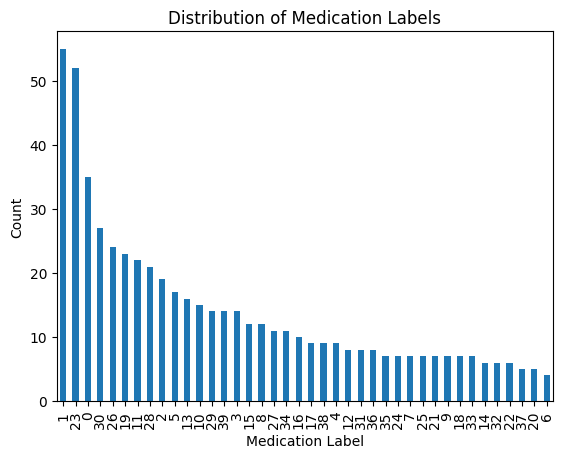

In [ ]:
# prompt: plot bar plot of Y

import matplotlib.pyplot as plt

# Assuming 'y' is your target variable (Medication_Label)
y.value_counts().plot(kind='bar')
plt.title('Distribution of Medication Labels')
plt.xlabel('Medication Label')
plt.ylabel('Count')
plt.show()


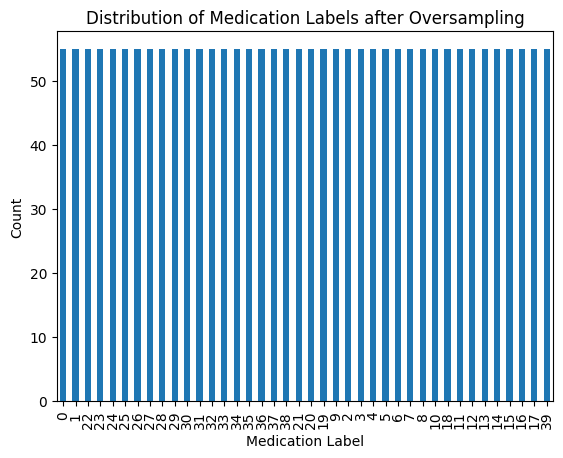

In [ ]:
# prompt: apply random oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after oversampling
y_resampled.value_counts().plot(kind='bar')
plt.title('Distribution of Medication Labels after Oversampling')
plt.xlabel('Medication Label')
plt.ylabel('Count')
plt.show()


In [ ]:
X= X_resampled
y= y_resampled

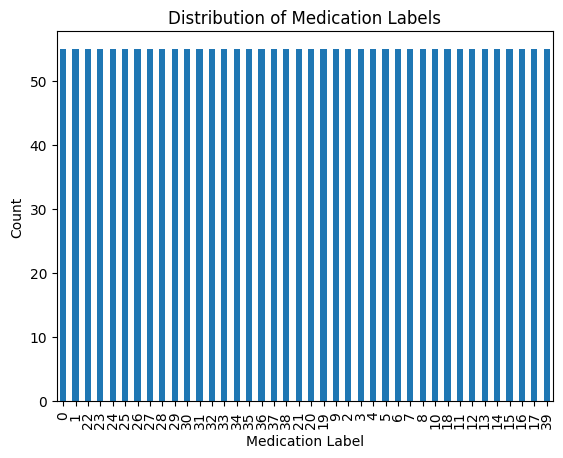

In [ ]:
# prompt: plot bar plot of Y

import matplotlib.pyplot as plt

# Assuming 'y' is your target variable (Medication_Label)
y.value_counts().plot(kind='bar')
plt.title('Distribution of Medication Labels')
plt.xlabel('Medication Label')
plt.ylabel('Count')
plt.show()


In [ ]:
y_resampled.shape

(2200,)

## Model

### DecisionTreeClassifier

### DecisionTreeRegressor

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import joblib

# # Load the preprocessed dataset
# conditions_df = pd.read_csv('conditions_and_medications.csv')

# # Create a dictionary to map conditions to labels
# condition_to_label = {condition: label for label, condition in enumerate(conditions_df['Condition'].unique())}

# # Add a new column with encoded conditions in the dataset
# conditions_df['Condition_Label'] = conditions_df['Condition'].map(condition_to_label)

# # Convert 'Medication' column to numeric (if necessary)
# medication_to_label = {medication: label for label, medication in enumerate(conditions_df['Medication'].unique())}
# conditions_df['Medication_Label'] = conditions_df['Medication'].map(medication_to_label)

# # Define the feature (X) and target (y)
# X = conditions_df[['Condition_Label']]
# y = conditions_df['Medication_Label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Create and train a Random Forest Classifier
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# Save the trained model
joblib.dump(model1, 'model1.pkl')

# Make predictions on the test data
y_pred_test = model1.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score on the test data
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Accuracy on Test Data:", accuracy)
print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)
print("F1 Score on Test Data:", f1)

Accuracy on Test Data: 1.0
Precision on Test Data: 1.0
Recall on Test Data: 1.0
F1 Score on Test Data: 1.0


### xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import joblib

# # Load the preprocessed dataset
# conditions_df = pd.read_csv('conditions_and_medications.csv')

# # Create a dictionary to map conditions to labels
# condition_to_label = {condition: label for label, condition in enumerate(conditions_df['Condition'].unique())}

# # Add a new column with encoded conditions in the dataset
# conditions_df['Condition_Label'] = conditions_df['Condition'].map(condition_to_label)

# # Convert 'Medication' column to numeric (if necessary)
# medication_to_label = {medication: label for label, medication in enumerate(conditions_df['Medication'].unique())}
# conditions_df['Medication_Label'] = conditions_df['Medication'].map(medication_to_label)

# # Define the feature (X) and target (y)
# X = conditions_df[['Condition_Label']]
# y = conditions_df['Medication_Label']

# # Split the dataset into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create and train an XGBoost Classifier
model2 = XGBClassifier(n_estimators=2, random_state=42, use_label_encoder=False, eval_metric='logloss')
model2.fit(X_train, y_train)

# Save the trained model
joblib.dump(model2, 'model2.pkl')

# Make predictions on the test data
y_pred_test = model2.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score on the test data
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Accuracy on Test Data:", accuracy)
print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)
print("F1 Score on Test Data:", f1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Test Data: 0.9865196078431373
Precision on Test Data: 0.9905545013704407
Recall on Test Data: 0.9865196078431373
F1 Score on Test Data: 0.9862465594843891


### CatBoostClassifier


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
!pip install catboost #Make sure catboost is installed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import joblib

# # Load the preprocessed dataset
# conditions_df = pd.read_csv('conditions_and_medications.csv')

# # Create a dictionary to map conditions to labels
# condition_to_label = {condition: label for label, condition in enumerate(conditions_df['Condition'].unique())}

# # Add a new column with encoded conditions in the dataset
# conditions_df['Condition_Label'] = conditions_df['Condition'].map(condition_to_label)

# # Convert 'Medication' column to numeric (if necessary)
# medication_to_label = {medication: label for label, medication in enumerate(conditions_df['Medication'].unique())}
# conditions_df['Medication_Label'] = conditions_df['Medication'].map(medication_to_label)

# # Define the feature (X) and target (y)
# X = conditions_df[['Condition_Label']]
# y = conditions_df['Medication_Label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Create and train a CatBoost Classifier
model3 = CatBoostClassifier(iterations=5, random_seed=42, verbose=0)
model3.fit(X_train, y_train)

# Save the trained model
joblib.dump(model3, 'model3.pkl')

# Make predictions on the test data
y_pred_test = model3.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score on the test data
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Accuracy on Test Data:", accuracy)
print("Precision on Test Data:", precision)
print("Recall on Test Data:", recall)
print("F1 Score on Test Data:", f1)

Accuracy on Test Data: 1.0
Precision on Test Data: 1.0
Recall on Test Data: 1.0
F1 Score on Test Data: 1.0


### Testing


In [ ]:
conditions_df

,Condition,Medication,Condition_Label,Medication_Label
0,asthma,Asthalin,0,0
1,cold/ cough/ fever,Paracetamol,1,1
2,cold/ cough/ fever,Paracetamol,1,1
3,cold/ cough/ fever,Paracetamol,1,1
4,anxiety,Lectopam,2,2
5,asthma,Asthalin,0,0
6,anxiety,Antidepressants,2,3
7,cold/ cough/ fever,Paracetamol,1,1
8,cold/ cough/ fever,MontairFX,1,4
9,cold/ cough/ fever,Paracetamol,1,1


In [ ]:
# List of available conditions
available_conditions = conditions_df['Condition'].unique()

# Get symptoms input from the user
entered_symptoms = []
print("Available conditions to choose from:")
for idx, condition in enumerate(available_conditions):
    print(f"{idx + 1}. {condition}")
while True:
    choice = input("Enter a number corresponding to a symptom (or 'done' to finish): ")
    if choice.lower() == 'done':
        break
    try:
        index = int(choice) - 1
        if 0 <= index < len(available_conditions):
            entered_symptoms.append(available_conditions[index])
        else:
            print("Invalid choice. Please enter a valid number.")
    except ValueError:
        print("Invalid input. Please enter a number or 'done'.")

# Encode entered symptoms using the condition-to-label mapping
entered_symptoms_encoded = [condition_to_label[symptom] for symptom in entered_symptoms]

# Predict medications for the entered symptoms
predicted_medications = model.predict(pd.DataFrame(entered_symptoms_encoded, columns=['Condition_Label']))

# Print the predicted medications
print("Predicted Medications:")
for symptom, medication in zip(entered_symptoms, predicted_medications):
    print(f"For symptom '{symptom}', predicted medication: {medication}")

Available conditions to choose from:
1. asthma
2. cold/ cough/ fever
3. anxiety
4. back pain
5. diabetes
6. gastric
7. thyroid
8. allergies
Enter a number corresponding to a symptom (or 'done' to finish): 1
Enter a number corresponding to a symptom (or 'done' to finish): done
Predicted Medications:
For symptom 'asthma', predicted medication: Asthalin


### Dash

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 44.7 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Medication Predictor"),
    html.Label("Select Symptoms:"),
    dcc.Dropdown(
        id='symptoms-dropdown',
        options=[{'label': condition, 'value': condition} for condition in available_conditions],
        multi=True
    ),
    html.Div(id='output-container')
])

# Define callback to update output based on selected symptoms
@app.callback(
    Output('output-container', 'children'),
    Input('symptoms-dropdown', 'value')
)
def update_output(selected_symptoms):
    if selected_symptoms:
        # Encode selected symptoms using the condition-to-label mapping
        selected_symptoms_encoded = [condition_to_label[symptom] for symptom in selected_symptoms]

        # Predict medications for the selected symptoms
        predicted_medications = model.predict(pd.DataFrame(selected_symptoms_encoded, columns=['Condition_Label']))

        # Create a list of predicted medications
        medications_list = []
        for symptom, medication in zip(selected_symptoms, predicted_medications):
            medications_list.append(f"For symptom '{symptom}', predicted medication: {medication}")

        return html.Div([html.P(medication) for medication in medications_list])
    else:
        return ""

if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-33-7a5c38bdec54>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-33-7a5c38bdec54>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

In [ ]:
!pip uninstall lazypredict -y

Found existing installation: lazypredict 0.2.12
Uninstalling lazypredict-0.2.12:
  Successfully uninstalled lazypredict-0.2.12


In [ ]:
!pip install lazypredict==0.2.9

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl.metadata (12 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.0.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-manylinux1_x86_64.whl.metadata (12 kB)
  Using cached numpy-1.19.1.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install scikit-learn==0.24.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Install lazypredict from GitHub
!pip uninstall lazypredict
!pip install git+https://github.com/shankarpandala/lazypredict.git

# Import libraries
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Your existing data (replace with your actual data)
# X = your feature matrix
# y = your target vector

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display results
print(models)


Found existing installation: lazypredict 0.2.12
Uninstalling lazypredict-0.2.12:
  Would remove:
    /usr/local/bin/lazypredict
    /usr/local/lib/python3.10/dist-packages/lazypredict-0.2.12.dist-info/*
    /usr/local/lib/python3.10/dist-packages/lazypredict/*
Proceed (Y/n)? Y
  Successfully uninstalled lazypredict-0.2.12
  Cloning https://github.com/shankarpandala/lazypredict.git to /tmp/pip-req-build-iqequc14
  Running command git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-iqequc14
  Resolved https://github.com/shankarpandala/lazypredict.git to commit 4529b96e09fad6a0935c45c7060cfe3d51cfdf90
  Preparing metadata (setup.py) ... done
  Created wheel for lazypredict: filename=lazypredict-0.2.12-py2.py3-none-any.whl size=12326 sha256=a4b611864961434642d3c0982756718d07598594af11ed845d812bdd6a83733e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rhed6sj4/wheels/c1/0d/a5/13b226e20f8f57f2b4f456375f6993b30f7900d29d6609ff4f
Successf

 97%|█████████▋| 30/31 [00:04<00:00,  6.74it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.735399
[LightGBM] [Info] Start training from score -3.622921
[LightGBM] [Info] Start training from score -3.784190
[LightGBM] [Info] Start training from score -3.759497
[LightGBM] [Info] Start training from score -3.601868
[LightGBM] [Info] Start training from score -3.735399
[LightGBM] [Info] Start training from score -3.735399
[LightGBM] [Info] Start training from score -3.601868
[LightGBM] [Info] Start training from score -3.622921
[LightGBM] [Info] Start training from score -3.711869
[LightGBM] [Info] Start training from score -3.644428
[LightGBM] [Info] Start training from score -3.809507
[Li

100%|██████████| 31/31 [00:06<00:00,  4.69it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
KNeighborsClassifier               1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
LabelSpreading                     1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
RandomForestClassifier             1.00 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

# Load the dataset
# conditions_df = pd.read_csv('conditions_and_medications.csv')

# # Label encode 'Condition' and 'Medication' columns
# condition_to_label = {condition: label for label, condition in enumerate(conditions_df['Condition'].unique())}
# conditions_df['Condition_Label'] = conditions_df['Condition'].map(condition_to_label)

# medication_to_label = {medication: label for label, medication in enumerate(conditions_df['Medication'].unique())}
# conditions_df['Medication_Label'] = conditions_df['Medication'].map(medication_to_label)

# # Features and target
# X = conditions_df[['Condition_Label']].values
# y = conditions_df['Medication_Label'].values

# # Split the dataset into labeled and unlabeled data (semi-supervised)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the PSO parameters
num_particles = 30
num_iterations = 50
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient

# Initialize particles for hyperparameters: gamma, alpha, and n_neighbors
particle_positions = np.random.rand(num_particles, 3)  # [gamma, alpha, n_neighbors]
particle_velocities = np.random.rand(num_particles, 3)
pbest_positions = particle_positions.copy()
pbest_scores = np.zeros(num_particles)
gbest_position = np.zeros(3)
gbest_score = 0

# Objective function to maximize accuracy
def fitness(position):
    gamma = position[0] * 20  # Scale gamma from 0 to 20
    alpha = max(0.01, position[1] * 0.5)  # Scale alpha from 0.01 to 0.5
    n_neighbors = max(1, int(position[2] * 19) + 1)  # Scale n_neighbors from 1 to 20
    model = LabelSpreading(kernel='knn', gamma=gamma, alpha=alpha, n_neighbors=n_neighbors, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    return accuracy_score(y_test, predictions)

# Initialize pbest_scores and gbest_score
for i in range(num_particles):
    pbest_scores[i] = fitness(pbest_positions[i])
    if pbest_scores[i] > gbest_score:
        gbest_score = pbest_scores[i]
        gbest_position = pbest_positions[i].copy()

# PSO optimization loop
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Update velocities and positions
        r1, r2 = np.random.rand(2)
        particle_velocities[i] = (w * particle_velocities[i] +
                                  c1 * r1 * (pbest_positions[i] - particle_positions[i]) +
                                  c2 * r2 * (gbest_position - particle_positions[i]))
        particle_positions[i] += particle_velocities[i]

        # Bound the particle positions
        particle_positions[i] = np.clip(particle_positions[i], 0, 1)

        # Evaluate fitness for updated positions
        fitness_value = fitness(particle_positions[i])
        if fitness_value > pbest_scores[i]:
            pbest_scores[i] = fitness_value
            pbest_positions[i] = particle_positions[i].copy()
        if fitness_value > gbest_score:
            gbest_score = fitness_value
            gbest_position = particle_positions[i].copy()

    print(f"Iteration {iteration + 1}/{num_iterations}, Best Fitness: {gbest_score:.4f}")

# After optimization, train the final model with the best hyperparameters
gamma_optimal = gbest_position[0] * 20
alpha_optimal = max(0.01, gbest_position[1] * 0.5)
n_neighbors_optimal = max(1, int(gbest_position[2] * 19) + 1)

final_model = LabelSpreading(kernel='knn', gamma=gamma_optimal, alpha=alpha_optimal, n_neighbors=n_neighbors_optimal, max_iter=1000)
final_model.fit(X_train_scaled, y_train)

# Evaluate final model on the test set
y_pred = final_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred)
final_precision = precision_score(y_test, y_pred, average='weighted')
final_recall = recall_score(y_test, y_pred, average='weighted')
final_f1 = f1_score(y_test, y_pred, average='weighted')

# Print final model evaluation
print(f"\nFinal Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")

Iteration 1/50, Best Fitness: 1.0000
Iteration 2/50, Best Fitness: 1.0000
Iteration 3/50, Best Fitness: 1.0000
Iteration 4/50, Best Fitness: 1.0000
Iteration 5/50, Best Fitness: 1.0000
Iteration 6/50, Best Fitness: 1.0000
Iteration 7/50, Best Fitness: 1.0000
Iteration 8/50, Best Fitness: 1.0000
Iteration 9/50, Best Fitness: 1.0000
Iteration 10/50, Best Fitness: 1.0000
Iteration 11/50, Best Fitness: 1.0000
Iteration 12/50, Best Fitness: 1.0000
Iteration 13/50, Best Fitness: 1.0000
Iteration 14/50, Best Fitness: 1.0000
Iteration 15/50, Best Fitness: 1.0000
Iteration 16/50, Best Fitness: 1.0000
Iteration 17/50, Best Fitness: 1.0000
Iteration 18/50, Best Fitness: 1.0000
Iteration 19/50, Best Fitness: 1.0000
Iteration 20/50, Best Fitness: 1.0000
Iteration 21/50, Best Fitness: 1.0000
Iteration 22/50, Best Fitness: 1.0000
Iteration 23/50, Best Fitness: 1.0000
Iteration 24/50, Best Fitness: 1.0000
Iteration 25/50, Best Fitness: 1.0000
Iteration 26/50, Best Fitness: 1.0000
Iteration 27/50, Best

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-94-874d8b3eb7d1>", line 76, in <cell line: 63>
    fitness_value = fitness(particle_positions[i])
  File "<ipython-input-94-874d8b3eb7d1>", line 52, in fitness
    predictions = model.predict(X_test_scaled)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py", line 190, in predict
    probas = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py", line 221, in predict_proba
    [
  File "/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py", line 222, in <listcomp>
    np.sum(self.label_distributions_[weight_matrix], axis=0)
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py", line 2172, in _sum_dispatcher
    def

TypeError: object of type 'NoneType' has no len()

In [ ]:
# prompt: apply LSTM on X and y

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Reshape the data for LSTM (samples, timesteps, features)
X = X.values.reshape((X.shape[0], 1, X.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
# Access the correct shape elements for X_train
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

AttributeError: 'numpy.ndarray' object has no attribute 'values'